In [44]:
import time
from groundlight import Groundlight
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

%matplotlib inline

In [45]:
API_TOKEN = "api_2LQMlBrU16twCBHDmgDGx0sfC0B_UbivTrD9iDYXPREF8YS7EhTVQ4Jq7FqJy8"
gl = Groundlight(api_token=API_TOKEN)

In [49]:
gl.list_detectors()

PaginatedDetectorList(count=1, next=None, previous=None, results=[Detector(id='det_2LQMza5pE0VdUkRWhtpmVJBpAHd', type=<DetectorTypeEnum.detector: 'detector'>, created_at=datetime.datetime(2023, 2, 7, 11, 45, 15, 940530, tzinfo=tzoffset(None, -28800)), name='is_at_desk', query='Is someone sitting at the desk this camera is on?', group_name='DemoSet', confidence_threshold=0.75)])

In [47]:
gl.list_image_queries()

PaginatedImageQueryList(count=0, next=None, previous=None, results=[])

In [48]:
query = "Is someone sitting at the desk this camera is on?"
d = gl.get_or_create_detector(name="is_at_desk", query=query)  # define with natural language

In [56]:
d

Detector(id='det_2LQMza5pE0VdUkRWhtpmVJBpAHd', type=<DetectorTypeEnum.detector: 'detector'>, created_at=datetime.datetime(2023, 2, 7, 11, 45, 15, 940530, tzinfo=tzoffset(None, -28800)), name='is_at_desk', query='Is someone sitting at the desk this camera is on?', group_name='DemoSet', confidence_threshold=0.75)

In [71]:
def capture_image(source=0) -> np.ndarray:
    vid = cv2.VideoCapture(source)
    time.sleep(1)  # Allow cam to initialize
    result, image = vid.read()
    vid.release()
    assert result, "Image did not capture successfully"
    return image

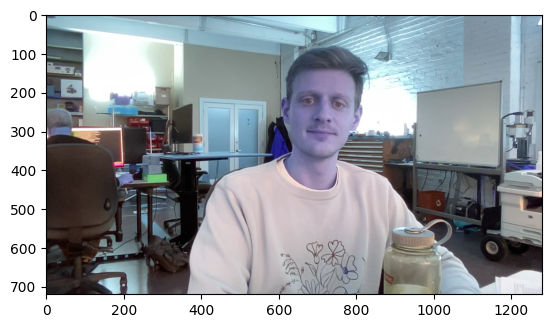

In [55]:
# Capture image
image = capture_image()
plt.imshow(image)

In [59]:
N_IMAGES_TO_SUBMIT = 10
image_queries = []

# Submit an image every 60 seconds
for i in range(N_IMAGES_TO_SUBMIT):
    image_arr = capture_image()
    image_query = gl.submit_image_query(detector=d, image=image_arr, wait=0)
    print(i, image_query)
    image_queries.append(image_query)
    time.sleep(4)

0 id='chk_2LQVRTH9uLiKBQliGZlULXLdgUl' type=<ImageQueryTypeEnum.image_query: 'image_query'> created_at=datetime.datetime(2023, 2, 7, 12, 54, 44, 761360, tzinfo=tzoffset(None, -28800)) query='Is someone sitting at the desk this camera is on?' detector_id='det_2LQMza5pE0VdUkRWhtpmVJBpAHd' result_type=<ResultTypeEnum.binary_classification: 'binary_classification'> result=ClassificationResult(confidence=0.7923249772616795, label='PASS')
1 id='chk_2LQVSHoZIGK9MJVBD09vKhiAE15' type=<ImageQueryTypeEnum.image_query: 'image_query'> created_at=datetime.datetime(2023, 2, 7, 12, 54, 51, 249578, tzinfo=tzoffset(None, -28800)) query='Is someone sitting at the desk this camera is on?' detector_id='det_2LQMza5pE0VdUkRWhtpmVJBpAHd' result_type=<ResultTypeEnum.binary_classification: 'binary_classification'> result=ClassificationResult(confidence=0.8153140204293388, label='PASS')
2 id='chk_2LQVT9I2aD9xl6mUL1VFlF1OOw9' type=<ImageQueryTypeEnum.image_query: 'image_query'> created_at=datetime.datetime(2023,

In [68]:
image_queries_response = gl.list_image_queries(page_size=50)
image_queries = image_queries_response.results
image_queries

[ImageQuery(id='chk_2LQVYb6DcqMbGilZSv5oybBR8Qk', type=<ImageQueryTypeEnum.image_query: 'image_query'>, created_at=datetime.datetime(2023, 2, 7, 12, 55, 41, 471565, tzinfo=tzoffset(None, -28800)), query='Is someone sitting at the desk this camera is on?', detector_id='det_2LQMza5pE0VdUkRWhtpmVJBpAHd', result_type=<ResultTypeEnum.binary_classification: 'binary_classification'>, result=ClassificationResult(confidence=0.8357583010518873, label='PASS')),
 ImageQuery(id='chk_2LQVXtbrwyNiceW62BMQqwu4pSH', type=<ImageQueryTypeEnum.image_query: 'image_query'>, created_at=datetime.datetime(2023, 2, 7, 12, 55, 35, 884516, tzinfo=tzoffset(None, -28800)), query='Is someone sitting at the desk this camera is on?', detector_id='det_2LQMza5pE0VdUkRWhtpmVJBpAHd', result_type=<ResultTypeEnum.binary_classification: 'binary_classification'>, result=ClassificationResult(confidence=0.8277775258631319, label='PASS')),
 ImageQuery(id='chk_2LQVXD1q2R7hi6BHRoqaAEAYCWM', type=<ImageQueryTypeEnum.image_query: 'i

In [69]:
img_query = image_queries[0]
img_query

ImageQuery(id='chk_2LQVYb6DcqMbGilZSv5oybBR8Qk', type=<ImageQueryTypeEnum.image_query: 'image_query'>, created_at=datetime.datetime(2023, 2, 7, 12, 55, 41, 471565, tzinfo=tzoffset(None, -28800)), query='Is someone sitting at the desk this camera is on?', detector_id='det_2LQMza5pE0VdUkRWhtpmVJBpAHd', result_type=<ResultTypeEnum.binary_classification: 'binary_classification'>, result=ClassificationResult(confidence=0.8357583010518873, label='PASS'))

In [ ]:
cap = cv2.VideoCapture("https://zssd-koala.secureplayer.camzonecdn.com/v1.3/CamzoneStreamPlayer?iframe=yes&channel=zssd-koala&muted=yes&mutebutton=no&czlogourl=&toolbar=always&backgroundcolor=000000&toolbarbgcolor=ffffff&toolbaralpha=100&toolbartextcolor=000000&epostcard=yes&toolbartype=new&toolbarposition=topright")

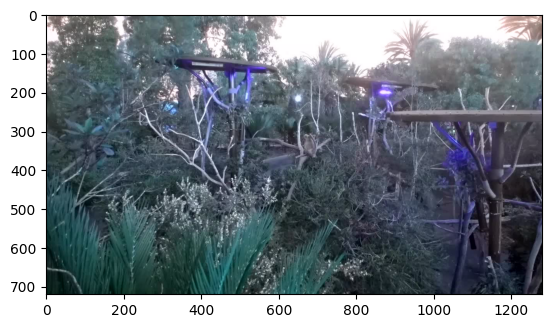

In [73]:
KOALA_STREAM = "https://zssd-koala.preview.api.camzonecdn.com/previewimage"
image = capture_image(KOALA_STREAM)
plt.imshow(image)